# Data Preprocessing Steps

Importing dataset

In [272]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
try:
    df = pd.read_csv('data_preprocessing.csv')
except FileNotFoundError:
    print("File not found")


In [273]:
# Displaying Dataset
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# 1.Handling missing data

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [275]:
# Counting null values in each columns
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [276]:
# Counting null values by percentage
df.isnull().sum()/len(df)*100

Country       0.0
Age          10.0
Salary       10.0
Purchased     0.0
dtype: float64

<AxesSubplot:>

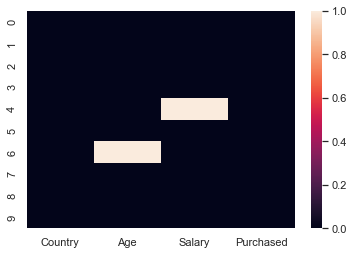

In [277]:
# Showing heatmap of null values
sns.heatmap(df.isnull())

In [278]:
# Getting columns which contains null values
null_value_col_df = df.loc[:, df.isna().any()]
null_value_col_df

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [279]:
# Getting only numeric type columns which contains null values
num_null_value_col_df=null_value_col_df.select_dtypes(include=['int64','float64'])
num_null_value_col_df

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

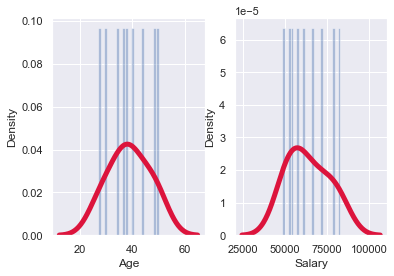

In [283]:
# Checking that columns are normally distributed or not
sns.set()
plt.subplot(1,2,1)
sns.distplot(df['Age'], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})
plt.subplot(1,2,2)
sns.distplot(df['Salary'], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [ ]:
# Fill missing numeric value with mean of that column
df=df.fillna(df.mean(numeric_only=True))
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


# 2.Handling Categorical data

In [ ]:
# Label Encoding to handle categorical data
df['Purchased'] = df['Purchased'].astype('category')
df['Purchased'] = df['Purchased'].cat.codes
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,0
1,Spain,27.000000,48000.000000,1
2,Germany,30.000000,54000.000000,0
3,Spain,38.000000,61000.000000,0
4,Germany,40.000000,63777.777778,1
5,France,35.000000,58000.000000,1
6,Spain,38.777778,52000.000000,0
7,France,48.000000,79000.000000,1
8,Germany,50.000000,83000.000000,0
9,France,37.000000,67000.000000,1


In [ ]:
# One hot encoding to handle categorical data
df = pd.get_dummies(df,prefix = None)
df


,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.000000,72000.000000,0,1,0,0
1,27.000000,48000.000000,1,0,0,1
2,30.000000,54000.000000,0,0,1,0
3,38.000000,61000.000000,0,0,0,1
4,40.000000,63777.777778,1,0,1,0
5,35.000000,58000.000000,1,1,0,0
6,38.777778,52000.000000,0,0,0,1
7,48.000000,79000.000000,1,1,0,0
8,50.000000,83000.000000,0,0,1,0
9,37.000000,67000.000000,1,1,0,0


# 3.Feature Scaling

In [ ]:
# Feature scaling using Standardization
for col in df.columns[:]:
   df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)
print(df)

        Age        Salary  Purchased  Country_France  Country_Germany  \
0  0.758874  7.494733e-01       -1.0        1.224745        -0.654654   
1 -1.711504 -1.438178e+00        1.0       -0.816497        -0.654654   
2 -1.275555 -8.912655e-01       -1.0       -0.816497         1.527525   
3 -0.113024 -2.532004e-01       -1.0       -0.816497        -0.654654   
4  0.177609  6.632192e-16        1.0       -0.816497         1.527525   
5 -0.548973 -5.266569e-01        1.0        1.224745        -0.654654   
6  0.000000 -1.073570e+00       -1.0       -0.816497        -0.654654   
7  1.340140  1.387538e+00        1.0        1.224745        -0.654654   
8  1.630773  1.752147e+00       -1.0       -0.816497         1.527525   
9 -0.258340  2.937125e-01        1.0        1.224745        -0.654654   

   Country_Spain  
0      -0.654654  
1       1.527525  
2      -0.654654  
3       1.527525  
4      -0.654654  
5      -0.654654  
6       1.527525  
7      -0.654654  
8      -0.654654  
9     

# 4.Split the dataset into training set and test set

In [ ]:
import math
df = df.reindex(columns = ['Age','Salary','Country_France','Country_Germany','Country_Spain','Purchased'])
df = df.sample(frac = 1)
# s_f = float(input("Enter the splitting factor (i.e) ratio between train and test"))
# n = math.floor(s_f * df.shape[0])
s_f = 0.6
n = math.floor(s_f * df.shape[0])
l = len(df)
x_train = df[['Age', 'Salary','Country_France','Country_Germany','Country_Spain']].head(n)
y_train = df[['Purchased']].head(n)
x_test = df[['Age', 'Salary','Country_France','Country_Germany','Country_Spain']].head(l-n)
y_test = df[['Purchased']].head(l-n)

print("x_train")
print(x_train)
print("\ny_train")
print(y_train)
print("\nx_test")
print(x_test)
print("\ny_test")
print(y_test)

x_train
        Age    Salary  Country_France  Country_Germany  Country_Spain
2 -1.275555 -0.891265       -0.816497         1.527525      -0.654654
7  1.340140  1.387538        1.224745        -0.654654      -0.654654
0  0.758874  0.749473        1.224745        -0.654654      -0.654654
3 -0.113024 -0.253200       -0.816497        -0.654654       1.527525
5 -0.548973 -0.526657        1.224745        -0.654654      -0.654654
1 -1.711504 -1.438178       -0.816497        -0.654654       1.527525

y_train
   Purchased
2       -1.0
7        1.0
0       -1.0
3       -1.0
5        1.0
1        1.0

x_test
        Age    Salary  Country_France  Country_Germany  Country_Spain
2 -1.275555 -0.891265       -0.816497         1.527525      -0.654654
7  1.340140  1.387538        1.224745        -0.654654      -0.654654
0  0.758874  0.749473        1.224745        -0.654654      -0.654654
3 -0.113024 -0.253200       -0.816497        -0.654654       1.527525

y_test
   Purchased
2       -1.0
7        1